<a href="https://colab.research.google.com/github/RubyNixx/machine_learning/blob/main/Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Machine Learning**

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving grades_multi_1000.csv to grades_multi_1000.csv


## 1 Understanding the Dataset

Before we can build any machine learning model, it's crucial to explore and understand our dataset. We'll begin by loading our dataset, checking its shape, viewing sample entries, and analyzing key statistical metrics.



### Step 1: Load data

In [ ]:
# Load the dataset from a CSV file into a Pandas DataFrame
df1 = pd.read_csv('grades_multi_1000.csv')

# Print the shape of the dataset (rows, columns)
print("Dataset Shape:", df1.shape)

# Display the first five rows of the dataset
df1.head()

Dataset Shape: (1000, 6)


,SRN_Number,Hours_Studied,Hours_Sleep,Number_of_Assignments,Dist_from_College,Grade
0,SRN 5452137,110,7,10,17.92,33
1,SRN 5452138,205,9,18,0.30,82
2,SRN 5452139,108,6,13,8.37,43
3,SRN 5452141,485,12,30,4.98,97
4,SRN 5452143,390,9,19,1.03,78


### Step 2: Cleaning the Data

In [ ]:
# Remove the 'SRN_Number' column since it is just an identifier and not useful for prediction
del df1['SRN_Number']

# Check for missing values in the dataset
missing_values = df1.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Hours_Studied            0
Hours_Sleep              0
Number_of_Assignments    0
Dist_from_College        0
Grade                    0
dtype: int64


### Step 3: Summary Statistics

In [ ]:
df1.describe()

,Hours_Studied,Hours_Sleep,Number_of_Assignments,Dist_from_College,Grade
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,240.028000,8.027000,16.328000,4.943230,65.144000
std,106.278438,2.191135,5.837679,5.463257,21.000626
min,75.000000,4.000000,4.000000,0.000000,30.000000
25%,158.000000,6.000000,12.000000,0.980000,47.000000
50%,220.000000,8.000000,16.000000,3.045000,65.000000
75%,305.000000,9.000000,21.000000,7.180000,84.000000
max,500.000000,14.000000,31.000000,40.050000,100.000000


### Step 4: Visualizing Relationships in the Data

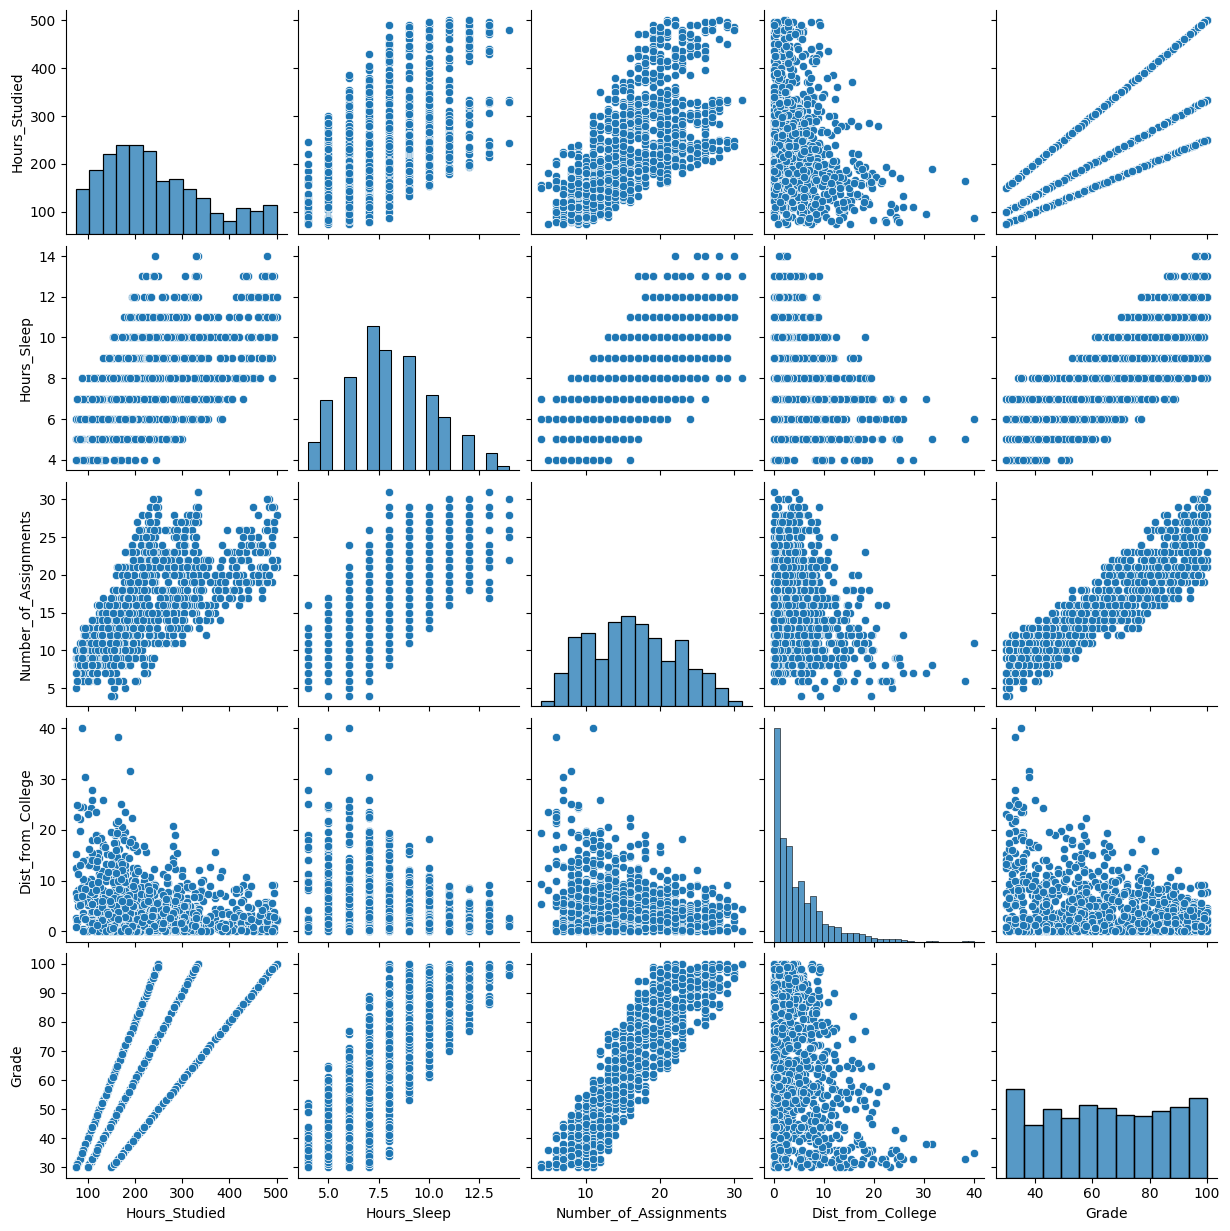

In [ ]:
import seaborn as sns
sns.pairplot(df1)

### Step 5: Correlation Analysis
`df1.corr()` Computes the [Pearson correlation coefficients](https://en.wikipedia.org/wiki/Correlation) between all numerical variables.

This gives us a numerical measure of how strongly features are related.






In [ ]:
corr = df1.corr()
corr

,Hours_Studied,Hours_Sleep,Number_of_Assignments,Dist_from_College,Grade
Hours_Studied,1.000000,0.572811,0.648979,-0.271497,0.734562
Hours_Sleep,0.572811,1.000000,0.707301,-0.287163,0.775565
Number_of_Assignments,0.648979,0.707301,1.000000,-0.310225,0.898977
Dist_from_College,-0.271497,-0.287163,-0.310225,1.000000,-0.359249
Grade,0.734562,0.775565,0.898977,-0.359249,1.000000


In [ ]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Hours_Studied,Hours_Sleep,Number_of_Assignments,Dist_from_College,Grade
Hours_Studied,1.000000,0.572811,0.648979,-0.271497,0.734562
Hours_Sleep,0.572811,1.000000,0.707301,-0.287163,0.775565
Number_of_Assignments,0.648979,0.707301,1.000000,-0.310225,0.898977
Dist_from_College,-0.271497,-0.287163,-0.310225,1.000000,-0.359249
Grade,0.734562,0.775565,0.898977,-0.359249,1.000000


💡Look at the correlation coefficient between Grade and Hours_Studied. Is it the value you were expecting?

💡How about Dist_from_College and Grade?

💡What would you infer from the correlation between Dist_from_College and Hours_Studied?

### Step 6: scaling
Look at the following line of code. Can you understand how it transforms the data?

In [ ]:
df1 = (df1 - df1.min()) / (df1.max() - df1.min())

You can take a look at the resulting dataframe to see the effect of this transformation

In [ ]:
df1

,Hours_Studied,Hours_Sleep,Number_of_Assignments,Dist_from_College,Grade
0,0.082353,0.3,0.222222,0.447441,0.042857
1,0.305882,0.5,0.518519,0.007491,0.742857
2,0.077647,0.2,0.333333,0.208989,0.185714
3,0.964706,0.8,0.962963,0.124345,0.957143
4,0.741176,0.5,0.555556,0.025718,0.685714
...,...,...,...,...,...
995,0.623529,0.2,0.444444,0.000000,0.542857
996,0.200000,0.3,0.185185,0.401248,0.028571
997,0.341176,0.3,0.518519,0.073159,0.514286
998,0.522353,0.6,0.851852,0.039700,0.842857


### **Why Do We Scale Features?**
Feature scaling is crucial in Machine Learning. Many models perform better when features are on similar scales. Scaling helps:
- Improve the convergence speed of models like Neural Networks.
- Prevent features with larger values from dominating those with smaller values.
- Standardize datasets with varying ranges.

We will apply **Min-Max Scaling**, which transforms values to a range between 0 and 1.

## 2 Machine Learning Models

Input/output

In [ ]:
X1 = df1[['Hours_Studied', 'Hours_Sleep', 'Number_of_Assignments', 'Dist_from_College']]
y1 = df1['Grade']

The train-test split is a crucial step in machine learning, ensuring that our model generalizes well to unseen data. By dividing the dataset into training (typically 80%) and testing (20%) sets, we allow the model to learn patterns from one portion while evaluating its performance on another. This prevents overfitting—where the model memorises training data but performs poorly on new inputs. The `random_state=0` parameter ensures reproducibility, meaning that every run results in the same split. Experimenting with different split ratios (e.g., 70-30 or 90-10) can help balance model training and evaluation, especially for small datasets.

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

### Linear Regression - small dataset
Linear Regression assumes a linear relationship between input features and output values. It calculates a best-fit line that minimizes the difference between predicted and actual values.


In [ ]:
model = LinearRegression() # create an instance of LinearRegression class
model.fit(X1_train, y1_train)

LinearRegression()

When training a Linear Regression model, we are trying to find the best coefficients for a linear equations. We can access the calculated coefficients in the variable `model.coef_`, which gets stored during the training. By investigating the value of the coefficients, we can gain further insights on the relationship between input and output.

In [ ]:
model.coef_

array([ 0.25762936,  0.3001821 ,  0.80215816, -0.13484477])

In [ ]:
coeff_df_1000 = pd.DataFrame(model.coef_, X1.columns, columns=['Coeff n=1000']) #creating a dataframe to display the coefficient against the corresponding variable
coeff_df_1000

,Coeff n=1000
Hours_Studied,0.257629
Hours_Sleep,0.300182
Number_of_Assignments,0.802158
Dist_from_College,-0.134845


The above table tells us that the final grade can be predicted as grade=0.25* Hours_studied+0.3 *Hours_Sleep....
The linear model coefficients confirms the slight negative correlation between the grade and the distance from college (by increasing the distance by 1 unit, we get a decrease in grade of 0.13).

In [ ]:
y1_pred = model.predict(X1_test)

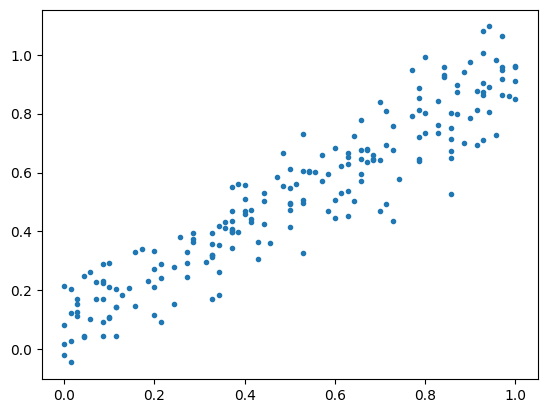

In [ ]:
plt.plot(y1_test,y1_pred, '.')

Evaluating regression models is essential to determine how well they predict numerical values. Since different metrics capture different aspects of model performance, using multiple evaluation measures provides a more comprehensive understanding.  

### **Key Evaluation Metrics**  

1. **Mean Absolute Error (MAE)**  
   MAE is the average absolute difference between actual and predicted values. It is calculated as:  

\begin{align}
MAE = \frac{1}{n} \sum |y_i - \hat{y_i}|
\end{align}

   MAE is easy to interpret and provides a direct measure of prediction accuracy but does not emphasize large errors.  

2. **Mean Squared Error (MSE)**  
   MSE is the average squared difference between actual and predicted values:  
  \begin{align}
   MSE = \frac{1}{n} \sum (y_i - \hat{y_i})^2
   \end{align}
   By squaring errors, MSE penalizes large deviations more, making it sensitive to outliers.  

3. **Root Mean Squared Error (RMSE)**  
   RMSE is the square root of MSE:  
   \begin{align}
   RMSE = \sqrt{MSE}
   \end{align}
   Since RMSE is in the same unit as the target variable, it is more interpretable than MSE.  

4. **R-squared (\( R^2 \))**  
   $R^2 $ measures the proportion of variance explained by the model:  
  \begin{align}
   R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
   \end{align}
   It ranges from 0 to 1, where higher values indicate better fit. However, a high $ R^2 $ does not always mean good predictive performance.  

Using multiple metrics helps identify whether errors are small but consistent (**MAE**), highly variable (**MSE/RMSE**), or if the model explains variance effectively.

In [ ]:
# calculate the r-squared
from sklearn import metrics
from sklearn.metrics import r2_score
r2_score1 = r2_score(y1_test, y1_pred)
RMSE1 = np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', RMSE1)
print('R-squared:', r2_score1)


Mean Absolute Error: 0.08380784962842414
Mean Squared Error: 0.011127211216507065
Root Mean Squared Error: 0.10548559719936682
R-squared: 0.8778258659875543


### Linear Regression - large dataset
We now implement the same model, but this time using the full dataset containing 20k points

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving grades_multi_20000.csv to grades_multi_20000.csv


In [ ]:
df20 = pd.read_csv('grades_multi_20000.csv')
print(df20.shape)
del df20['SRN_Number']
df20.isnull().sum()

(20000, 6)


,0
Hours_Studied,0
Hours_Sleep,0
Number_of_Assignments,0
Dist_from_College,0
Grade,0


In [ ]:
df20 = (df20 - df20.min()) / (df20.max() - df20.min())

X20 = df20[['Hours_Studied', 'Hours_Sleep', 'Number_of_Assignments', 'Dist_from_College']]
y20 = df20['Grade']
X20_train, X20_test, y20_train, y20_test = train_test_split(X20, y20, test_size=0.2, random_state=0)

In [ ]:
model20 = LinearRegression() # create an instance of LinearRegression class
model20.fit(X20_train, y20_train)

LinearRegression()

In [ ]:
coeff_df_20000 = pd.DataFrame(model20.coef_, X20.columns, columns=['Coeff n=20k'])
coeff_df_20000

,Coeff n=20k
Hours_Studied,0.229225
Hours_Sleep,0.338863
Number_of_Assignments,0.838153
Dist_from_College,-0.111752


In [ ]:
comp_LR = pd.concat([coeff_df_1000, coeff_df_20000], axis=1)
comp_LR


,Coeff n=1000,Coeff n=20k
Hours_Studied,0.257629,0.229225
Hours_Sleep,0.300182,0.338863
Number_of_Assignments,0.802158,0.838153
Dist_from_College,-0.134845,-0.111752


In [ ]:
y20_pred = model.predict(X20_test)

In [ ]:
# calculate and print error measures
r2_score20 = r2_score(y20_test, y20_pred)
RMSE20 = np.sqrt(metrics.mean_squared_error(y20_test, y20_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y20_test, y20_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y20_test, y20_pred))
print('Root Mean Squared Error:', RMSE20)
print('R-squared:', r2_score20)


Mean Absolute Error: 0.08476324463626608
Mean Squared Error: 0.01133400778734761
Root Mean Squared Error: 0.10646129713350111
R-squared: 0.869276266257432


In the following cell, we simply create a small table to compare error measures more easily.

In [ ]:
metric_data = {'RMSE': [RMSE1, RMSE20],
               'R-Sq': [r2_score1, r2_score20]}

comp_RMSE_LR = pd.DataFrame(metric_data, columns=['RMSE', 'R-Sq'], index=['Model_1k','Model_20k'])
comp_RMSE_LR

,RMSE,R-Sq
Model_1k,0.105486,0.877826
Model_20k,0.106461,0.869276


## Decision Tree

In this section, we're going to introduce the Decision Tree Regressor from sklearn, a powerful tool for predicting continuous values based on decision trees. Decision trees are a simple yet effective machine learning algorithm that splits the data into subsets based on feature values, helping the model make predictions.

With scikit-learn, implementing a Decision Tree Regressor is incredibly straightforward. The `DecisionTreeRegressor` class is easy to use and doesn't require extensive coding. Here’s how simple it is to apply this algorithm:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor()
regressor1.fit(X1_train, y1_train)

DecisionTreeRegressor()

In just these few lines, we first import the `DecisionTreeRegressor` from sklearn.tree. We then create an instance of this class, `regressor1`, and fit it to our training data `X1_train` and `y1_train`. The `.fit()` method takes care of the underlying computations, allowing the model to learn from the training set.

Scikit-learn abstracts much of the complexity, making it accessible even to beginners. You don’t need to worry about manually implementing tree-building algorithms or handling low-level details — scikit-learn handles all that for you. This ease of use lets you focus on experimenting with your data and building effective models quickly.

We can now evaluate how good our model is at making predictions on unseen data.

In [ ]:
y_pred_DT1 = regressor1.predict(X1_test)

In [ ]:
r2_scoreDT1 = r2_score(y1_test, y_pred_DT1)
RMSE_DT1 = np.sqrt(metrics.mean_squared_error(y1_test, y_pred_DT1))
print('Root Mean Squared Error:', RMSE_DT1)
print('R-squared:', r2_scoreDT1)

Root Mean Squared Error: 0.11521940029388121
R-squared: 0.8542380537945611


In [ ]:
metric_data = {'RMSE': [RMSE1, RMSE20, RMSE_DT1],
               'R-Sq': [r2_score1, r2_score20, r2_scoreDT1]}

comp_RMSE_DT = pd.DataFrame(metric_data, columns=['RMSE', 'R-Sq'], index=['Model_1k','Model_20k','DT_1k'])
comp_RMSE_DT

,RMSE,R-Sq
Model_1k,0.105486,0.877826
Model_20k,0.106461,0.869276
DT_1k,0.115219,0.854238


We can now run the Decision Tree on n = 20,000 to see if that makes a difference...

In [ ]:

regressor = DecisionTreeRegressor()
regressor.fit(X20_train, y20_train)

DecisionTreeRegressor()

In [ ]:
y_pred_DT20 = regressor.predict(X20_test)

In [ ]:
r2_scoreDT20 = r2_score(y20_test, y_pred_DT20)
RMSE_DT20 = np.sqrt(metrics.mean_squared_error(y20_test, y_pred_DT20))
print('Root Mean Squared Error:', RMSE_DT20)
print('R-squared:', r2_scoreDT20)

Root Mean Squared Error: 0.09615205061117882
R-squared: 0.8933678812620225


In [ ]:
metric_data = {'RMSE': [RMSE1, RMSE20, RMSE_DT1, RMSE_DT20],
               'R-Sq': [r2_score1, r2_score20, r2_scoreDT1, r2_scoreDT20]}

comp_RMSE_DT = pd.DataFrame(metric_data, columns=['RMSE', 'R-Sq'], index=['Model_1k','Model_20k','DT_1k','DT_20k'])
comp_RMSE_DT

,RMSE,R-Sq
Model_1k,0.105486,0.877826
Model_20k,0.106461,0.869276
DT_1k,0.115219,0.854238
DT_20k,0.096152,0.893368



##3 **Artificial Neural Networks (ANNs)**
Now that we have explored traditional Machine Learning models like **Linear Regression** and **Decision Trees**, let's take a step into the world of **Deep Learning**.  

In this section, we introduce **Artificial Neural Networks (ANNs)** using **TensorFlow**. ANNs are inspired by the human brain and consist of multiple layers of interconnected neurons. These networks are particularly useful for handling complex patterns in data that traditional models struggle with.

### **What Will We Learn?**
- How to build a basic Neural Network using TensorFlow's `Sequential` API.
- The role of different layers, including **Dense (fully connected) layers** and **Dropout layers**.
- How to compile and train the model using an optimizer and loss function.
- Why RMSE is an important metric for evaluating regression models.

### **Breaking Down the Model**
This neural network has **three hidden layers** that use the **ReLU activation function**, which helps the model learn non-linear patterns in data. We also introduce a **Dropout layer** to reduce overfitting. The final output layer predicts a single value, making it suitable for regression tasks.

We will cover Neural Networks in more detail in **Part 2 of this module**, where we explore advanced architectures like **Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs)**. But for now, let’s get hands-on!



In [ ]:
# Model Hyperparameters

neurons = 128
epochs = 20

In [ ]:
# Importing TensorFlow, a popular deep learning library
import tensorflow as tf

# Defining the Neural Network model
model = tf.keras.Sequential([
    # First hidden layer with 'neurons' number of nodes and ReLU activation
    tf.keras.layers.Dense(neurons, activation='relu'),

    # Second hidden layer with the same number of neurons and ReLU activation
    tf.keras.layers.Dense(neurons, activation='relu'),

    # Third hidden layer with half the number of neurons to gradually reduce complexity
    tf.keras.layers.Dense(int(neurons / 2), activation='relu'),

    # Dropout layer to prevent overfitting by randomly setting 30% of nodes to zero during training
    tf.keras.layers.Dropout(0.3),

    # Output layer with a single neuron, using a linear activation function (default for regression tasks)
    tf.keras.layers.Dense(1, activation='linear')
])

# Compiling the model: defining the loss function, optimizer, and evaluation metric
model.compile(
    loss='mse',         # Mean Squared Error (MSE) is used as the loss function for regression problems
    optimizer='adam',   # Adam optimizer is efficient and adapts the learning rate dynamically
    metrics=['rmse']     # Using Root Mean Squared Error as a metric
)

# Alternative metrics:
# - 'mae' (Mean Absolute Error) is useful for interpreting errors in actual units.
# - 'mse' (Mean Squared Error) penalizes larger errors more.
# - 'rmse' (Root Mean Squared Error) can be computed manually if needed.



 **How is Training a Neural Network Different from Traditional ML Models?**
So far, we have trained simpler models like **Linear Regression** and **Decision Trees**, where the process followed three basic steps:
1. **Initialize the Model** – Define the type of model (e.g., Linear Regression).
2. **Train the Model** – Fit the model to the training data.
3. **Test the Model** – Evaluate it using the test set.

However, **Neural Networks require additional steps and decisions** before training. Unlike traditional models, which can be defined in just one line (e.g., `LinearRegression().fit(X_train, y_train)` - although we did split this step in two lines earlier), a Neural Network requires:
- **Layer Design:** Choosing the number of layers and neurons per layer.
- **Activation Functions:** Deciding how each neuron processes inputs (e.g., ReLU).
- **Regularization Techniques:** Adding Dropout layers to prevent overfitting.
- **Compilation:** Specifying a loss function and an optimizer before training.
- **Training with Batches & Epochs:** Instead of a single `.fit()` call, ANNs learn iteratively over multiple **epochs**, using **mini-batches** for efficiency - we will see this in the next cell.



In [ ]:
r1 = model.fit(X1_train, y1_train, epochs=epochs)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1539 - mse: 0.1539
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0232 - mse: 0.0232
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - mse: 0.0184
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mse: 0.0179
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 - mse: 0.0164
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mse: 0.0161
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mse: 0.0155
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mse: 0.0147
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 - mse: 0.0144
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - mse: 0.0165
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mse: 0.0142
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mse: 0.0148
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

What just happened? We just trained our neural network model using the `model.fit()` method. This step involves feeding our training data into the model and allowing it to adjust its internal parameters (weights and biases) to minimize the loss function. In simpler terms, the model is learning from the data, and `model.fit()` is the process of making the model better at predicting the outcomes for new, unseen data.

But how well is the model performing? To better understand the training process, we'll now plot the loss function over time. The loss function helps us measure how far the model's predictions are from the true values. A decreasing loss typically means our model is learning and improving.

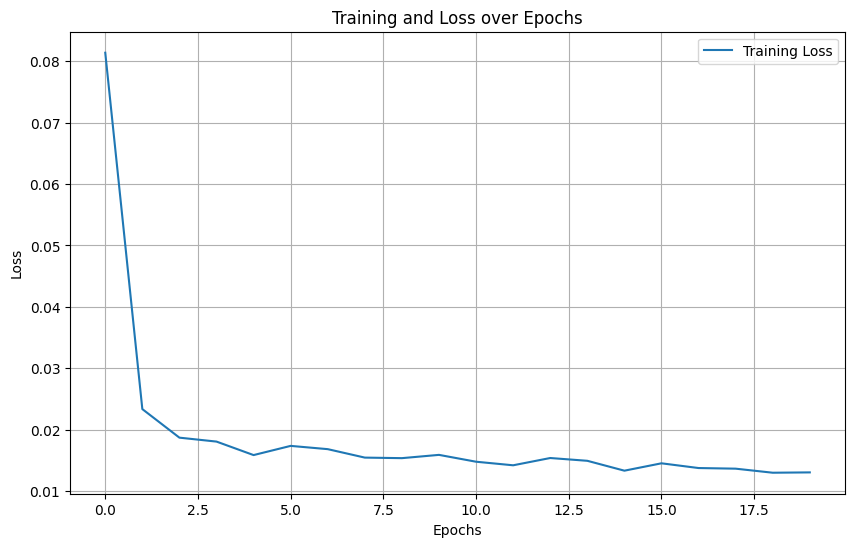

In [ ]:
# Extract loss values
training_loss = r1.history['loss']

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.title('Training and Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

By the way, if you are curious to know how many parameters we just trained, take a look at the following table:

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (32, 128)                   │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 128)                   │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 1)                     │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,421 (298.52 KB)

 Trainable params: 25,473 (99.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,948 (199.02 KB)

In [ ]:
y_pred_ANN1 = model.predict(X1_test)
y_pred_ANN1 = y_pred_ANN1.flatten()
r2_scoreANN1 = r2_score(y1_test, y_pred_ANN1)
RMSE_ANN1 = np.sqrt(metrics.mean_squared_error(y1_test, y_pred_ANN1))
print('Root Mean Squared Error:', RMSE_ANN1)
print('R-squared:', r2_scoreANN1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Root Mean Squared Error: 0.09526625675681102
R-squared: 0.9003514142054199


Train the Neural Network on the larger dataset...

In [ ]:
r20 = model.fit(X20_train, y20_train, epochs=epochs)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0126 - mse: 0.0126
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0110 - mse: 0.0110
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0100 - mse: 0.0100
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0094 - mse: 0.0094
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0091 - mse: 0.0091
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0084 - mse: 0.0084
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0087 - mse: 0.0087
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0083 - mse: 0.0083
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0081 - mse: 0.0081
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0078 - mse: 0.0078
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0082 - mse: 0.0082
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0080 - mse: 0.0080
Epoch 13/20
500/500 ━━━━━

In [ ]:
y_pred_ANN20 = model.predict(X20_test)
print(y_pred_ANN20.shape)
y_pred_ANN20 = y_pred_ANN20.flatten() # shape your input vector to correct dimension
y_pred_ANN20.shape

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(4000, 1)


(4000,)

In [ ]:
r2_scoreANN20 = r2_score(y20_test, y_pred_ANN20)
RMSE_ANN20 = np.sqrt(metrics.mean_squared_error(y20_test, y_pred_ANN20))
print('Root Mean Squared Error:', RMSE_ANN20)
print('R-squared:', r2_scoreANN20)

Root Mean Squared Error: 0.08114143761092955
R-squared: 0.9240624934066612


In [ ]:
metric_data = {'RMSE': [RMSE1, RMSE20, RMSE_DT1, RMSE_DT20, RMSE_ANN1, RMSE_ANN20],
               'R-Sq': [r2_score1, r2_score20, r2_scoreDT1, r2_scoreDT20, r2_scoreANN1, r2_scoreANN20]}

comp_RMSE_DT = pd.DataFrame(metric_data, columns=['RMSE', 'R-Sq'],
                            index=['Model_1k','Model_20k','DT_1k','DT_20k','ANN_1','ANN_20k'])
comp_RMSE_DT

,RMSE,R-Sq
Model_1k,0.105486,0.877826
Model_20k,0.106461,0.869276
DT_1k,0.115219,0.854238
DT_20k,0.096152,0.893368
ANN_1,0.095266,0.900351
ANN_20k,0.081141,0.924062


### **Making Predictions with a Trained Neural Network** 🎯

Now that we’ve trained our Neural Network, it’s time for the fun part — making predictions! This is where the model demonstrates its ability to generalize and apply what it has learned to unseen data.

Imagine a scenario: a student has studied for 20 hours, slept for 8 hours, completed 15 assignments, and lives 10 km away from the college. Using our trained Neural Network, we’ll predict their grade! 🎓

This step is all about **using the trained model in real-world scenarios**. It’s also a key transition from training/testing into practical application. Notice how we prepare the input data (just like the training features) and pass it into the model.

👉 This marks an important milestone — moving from building and evaluating the model to applying it in practice.


In [ ]:
studied = 20
slept = 8
assignments = 15
distance = 10

predicted = model.predict(np.array([[studied, slept, assignments, distance]]))

print(f"Predicted Grade: {predicted[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Predicted Grade: 23.592924118041992
